## Coronary Heart Disease Prediction

## For Statsly Analytics

### By Apurva Acharya

Problem Statement-

   A healthcare organization together with a couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a **coronary heart disease** in the next ten years or not.This study is useful in early identification of disease and have medical intervention if necessary. This wouldhelp not only in improving the health conditions but also the economy as it has been identified that health performance and economic performance are interlinked.
       
   As a data scientist, you are required to construct a classification model based on the available data and evaluate its efficacy. Your activities should include - performing various activities pertaining to the data such as, preparing the dataset for analysis; checking for any correlations; creating a model; evaluating the performance of the classification model.
   
   Important Points to be considered: Missing Data may be represented by either NAs, Blanks or values such as-999/-99 etc. Please check for various possibilities.


## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Import data

In [2]:
data=pd.read_csv("D:\HeartDisease.csv")
data

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34276,1297376,1,0,10.0,0,0,9,14,24,0,...,0,0.89,0.90,0,0,0,1,17.050805,0,1
34277,2131919,88,2,4.0,0,0,0,0,0,5,...,0,0.22,0.14,1,0,0,1,17.004158,0,1
34278,1466851,1,4,8.0,0,0,0,0,10,2,...,0,0.99,0.99,0,0,0,1,17.068666,0,1
34279,1554343,5,0,2.0,0,0,0,0,144,0,...,0,0.85,0.74,0,0,0,1,17.054827,0,1


### Replacing values less than zero

In [3]:
data.clip(0,inplace=True)

In [4]:
data.head(15)

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0
5,1566137,6648,2327,6.0,1404,0,11604,23532,35880,10516,...,0,0.74,0.50,0,0,0,1,17.073619,0,0
6,3265646,10,3,8.0,0,0,3,12,21,3,...,0,0.98,0.98,0,0,0,1,17.078496,0,0
7,2809957,22,0,8.0,1,0,0,0,3,5,...,0,0.99,0.99,0,0,0,1,17.091436,0,0
8,1240251,160,43,8.0,13,0,0,120,180,15,...,0,1.00,1.00,0,0,0,1,17.049562,0,0
9,1784378,8,0,12.0,0,0,0,0,0,0,...,0,0.74,0.74,0,0,0,1,17.051237,0,0


In [5]:
data.shape

(34281, 25)

The data has 34281 rows and 25 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      32538 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

In [7]:
data.columns

Index(['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'Target'],
      dtype='object')

## Looking for null values

In [8]:
data.isnull().sum()

ID           0
IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64

There are 1743 null values in A2 column.

In [9]:
# Replacing null values
data.fillna(0)

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34276,1297376,1,0,10.0,0,0,9,14,24,0,...,0,0.89,0.90,0,0,0,1,17.050805,0,1
34277,2131919,88,2,4.0,0,0,0,0,0,5,...,0,0.22,0.14,1,0,0,1,17.004158,0,1
34278,1466851,1,4,8.0,0,0,0,0,10,2,...,0,0.99,0.99,0,0,0,1,17.068666,0,1
34279,1554343,5,0,2.0,0,0,0,0,144,0,...,0,0.85,0.74,0,0,0,1,17.054827,0,1


In [10]:
data.columns

Index(['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'Target'],
      dtype='object')

In [11]:
data.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,237.662554,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,...,1.744757,0.705781,0.704425,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.291616,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,...,26.077507,0.313845,0.303672,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


In [12]:
dup=data.duplicated().sum()
print(dup)

0


There are no duplicates in the dataset.

<AxesSubplot:ylabel='Target'>

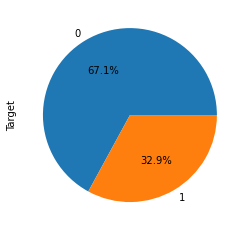

In [13]:
data['Target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

32.9% of the people in the dataset have a risk of Coronary Heart Disease.

<AxesSubplot:>

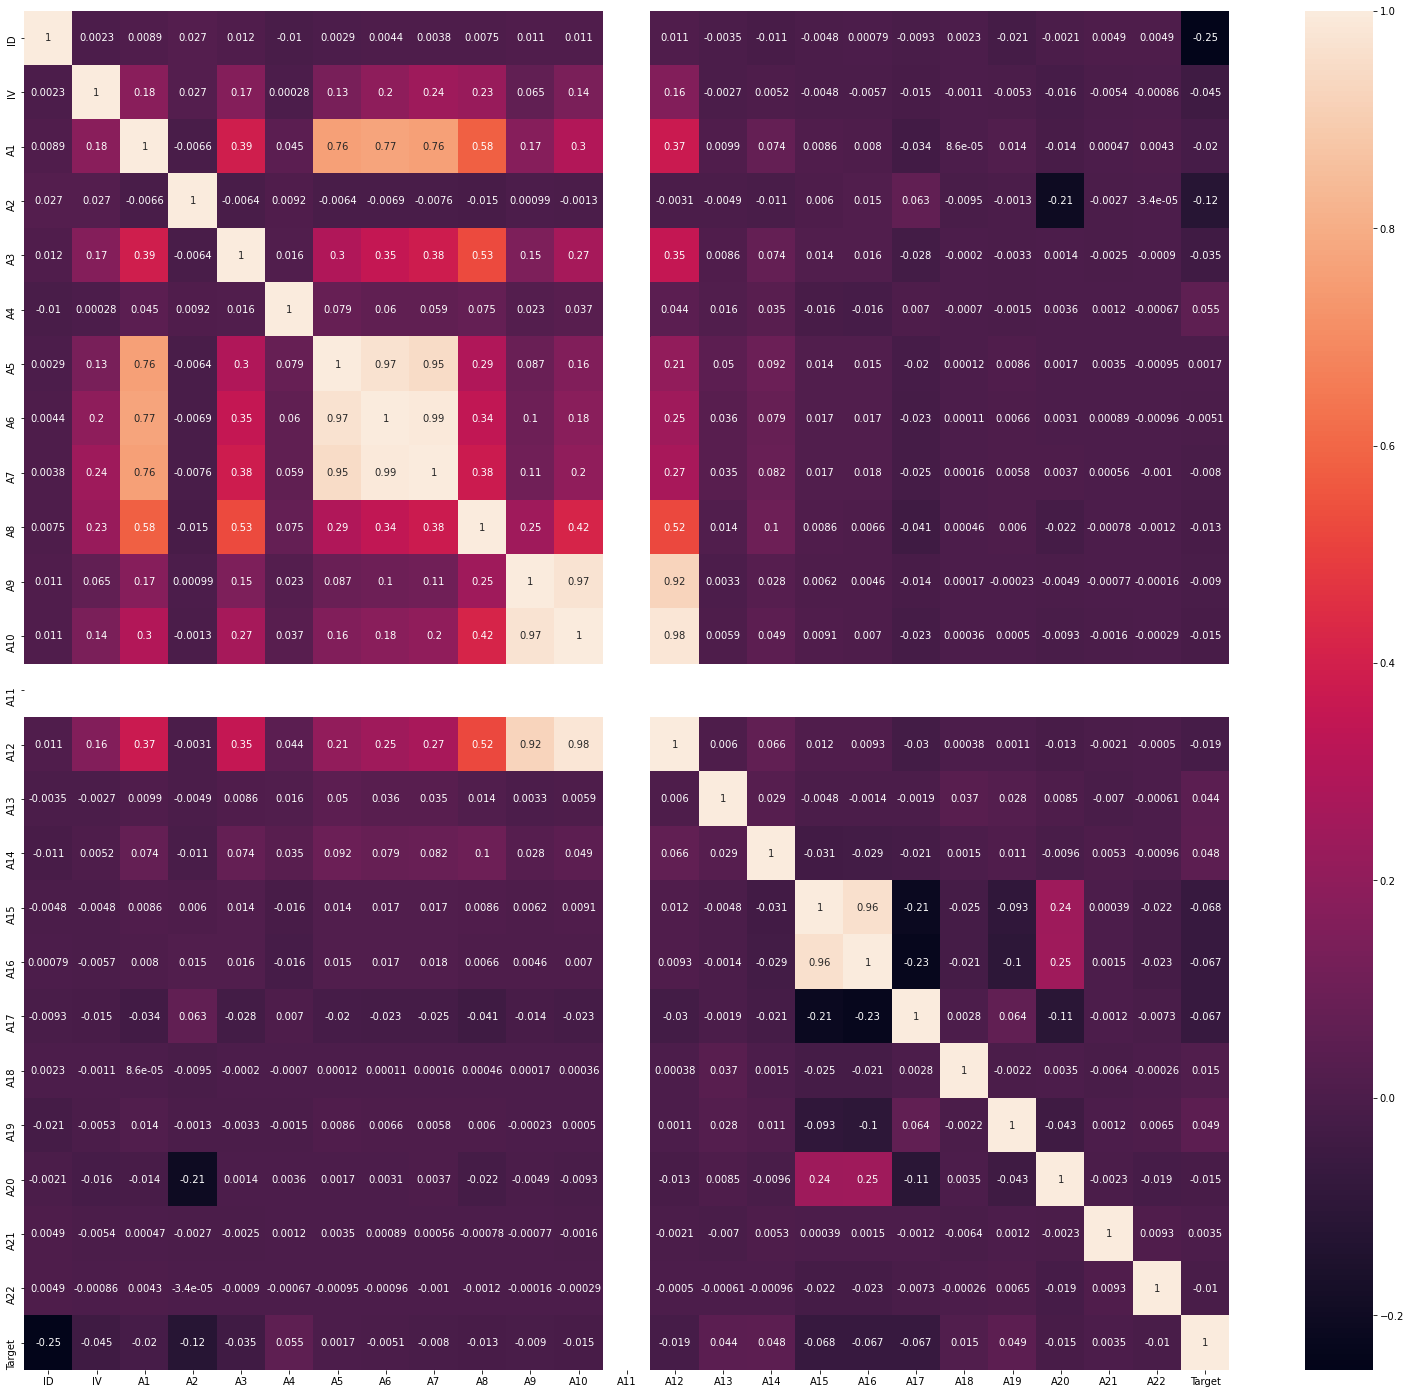

In [14]:
plt.figure(figsize=(27,25))
corr=data.corr()
sns.heatmap(corr,annot=True)

We see that the columns A4, A13,A14,A19 have some significant correlation coefficient with the target variable.

The column A11 has no relation with any other column.

We find a significant correlation between some of the columns like-A5 and A6, A12 an A9, etc.

ID should not matter in determining the risk.

In [15]:
data=data.drop(['A11','ID'],axis=1)
data.head(5)

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,2049,44,8.0,11,0,0,0,0,38,123,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,48,0,8.0,0,0,0,0,0,1,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,318,2,9.0,0,0,0,0,0,0,1,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,62,4,2.0,0,0,0,15,30,7,24,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2,0,8.0,0,0,0,0,1,0,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


Now the dataset has 23 Columns.

<AxesSubplot:>

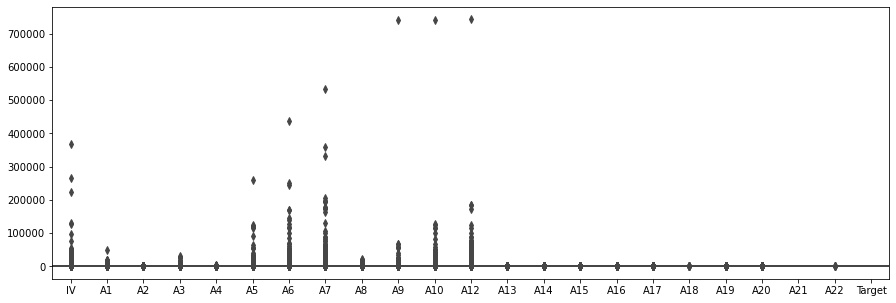

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,width=2)

There are outliers in the dataset.

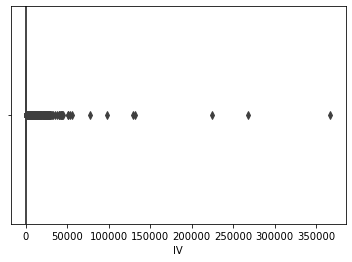

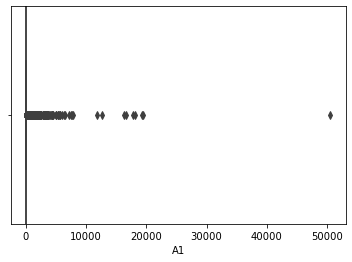

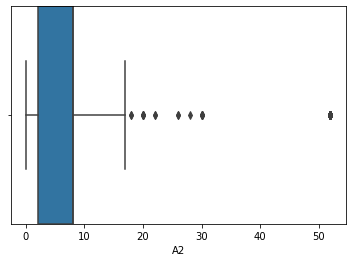

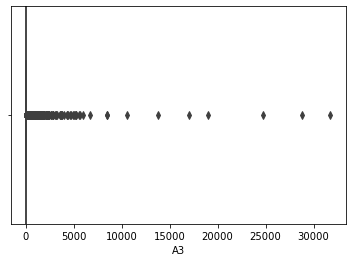

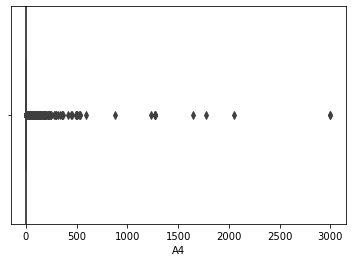

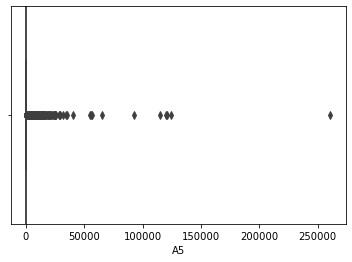

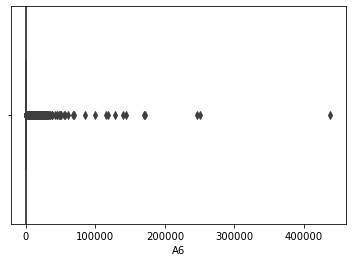

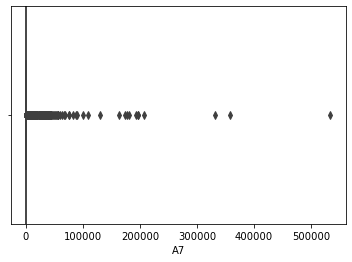

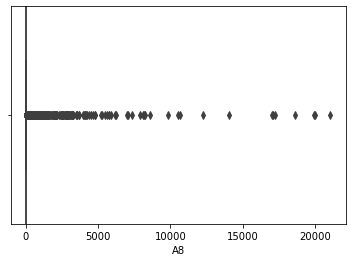

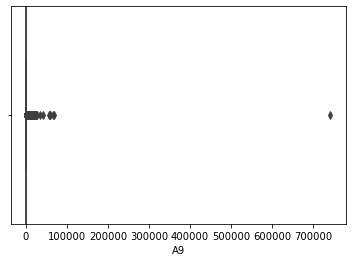

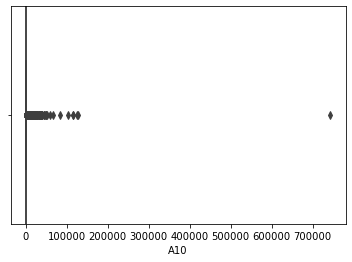

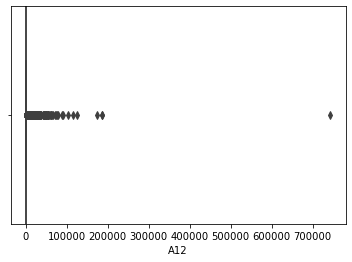

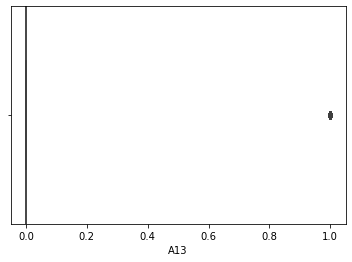

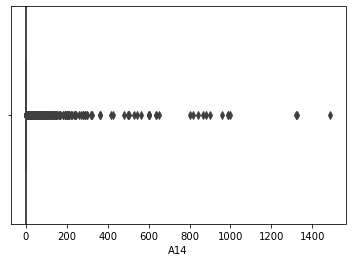

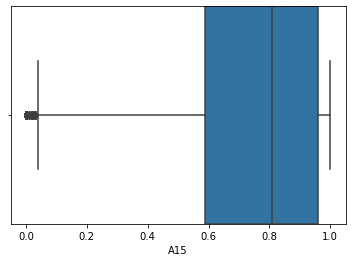

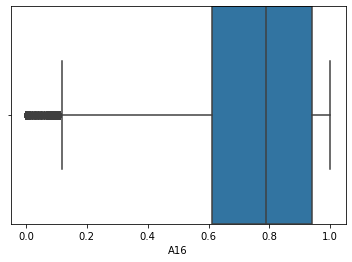

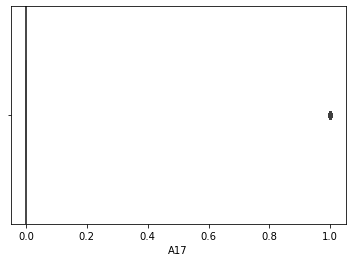

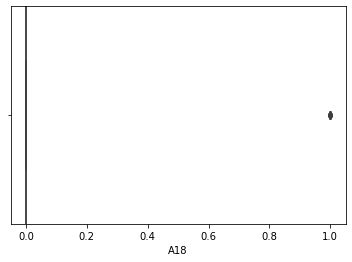

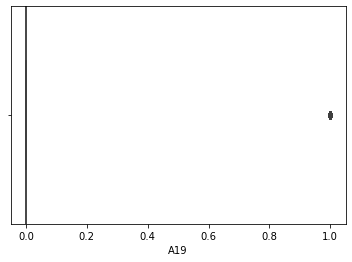

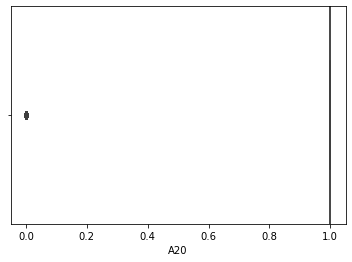

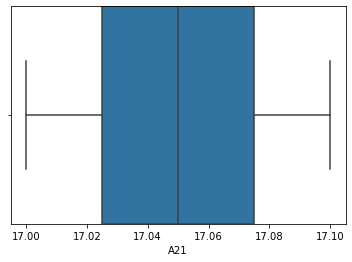

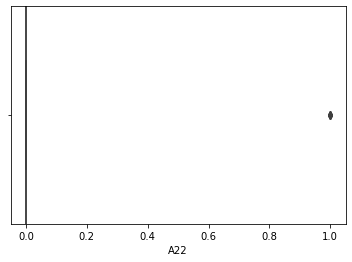

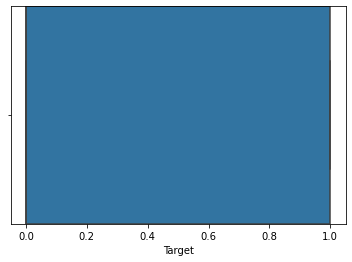

In [17]:
# Looking for outliers in each column

for col in data:
    plt.figure()
    sns.boxplot(data[col],width=1)

### Handling outliers

In [18]:
data[(data['IV']>50000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
2000,98008,3575,10.0,280,0,120600,250200,358200,1513,4864,...,0,0.97,0.96,0,0,0,1,17.013700,0,0
5480,55213,1086,2.0,0,0,0,0,0,8610,8808,...,0,1.00,1.00,0,0,0,1,17.027837,0,0
7393,53672,17747,4.0,31750,0,56000,140000,196000,21071,66174,...,0,0.98,0.96,0,0,0,1,17.004629,0,0
10494,267222,0,8.0,900,0,0,0,0,0,0,...,0,0.00,0.00,0,0,0,1,17.047151,0,0
16046,366924,0,12.0,0,0,0,0,0,3010,8025,...,0,0.96,0.86,0,0,0,1,17.053941,0,0
17243,128854,1,8.0,0,0,0,0,0,0,1,...,0,0.00,0.00,0,0,0,1,17.054125,0,0
19712,76888,19483,NaN,8464,0,0,0,0,19957,59210,...,0,0.00,0.00,0,0,1,1,17.044215,0,0
19929,131460,4566,2.0,0,0,0,0,0,232,605,...,0,1.00,0.99,0,0,0,1,17.060383,0,0
20294,50325,1077,14.0,329,0,34064,38152,55288,1269,3247,...,0,0.37,0.60,0,0,0,1,17.032361,0,0
21029,50654,140,8.0,24715,0,56295,118213,163356,248,580,...,0,0.42,0.67,0,0,0,1,17.056074,0,0


In [19]:
data.drop([2000,5480,7393,16046,19712,20294,21029,22950],inplace=True)

In [20]:
data[(data['A1']>10000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
5098,23197,16329,8.0,2306,0,65331,128250,192474,17056,56650,...,0,0.71,0.45,0,0,0,1,17.000344,0,0
5514,0,18148,8.0,0,0,124320,245568,332064,0,0,...,0,0.89,0.90,0,0,1,1,17.072796,0,0
7849,27189,12605,2.0,5254,0,40000,85000,130000,12247,40477,...,0,0.90,0.93,0,0,0,1,17.080589,0,0
14016,0,50547,8.0,0,0,260660,438020,533540,0,0,...,0,0.89,0.91,0,0,0,1,17.049014,0,0
15259,0,16630,8.0,0,0,115096,169664,195768,0,0,...,0,0.89,0.90,0,0,0,1,17.095877,0,0
15562,40064,19314,NaN,0,0,0,0,0,17277,67310,...,0,0.00,0.00,0,0,1,1,17.023192,0,0
19170,23431,11759,6.0,18996,0,54823,114919,177271,18627,58178,...,0,0.74,0.50,0,0,0,1,17.084070,0,0


In [21]:
data.drop([5098,5514,7849,14016,15259,15562,19170],inplace=True)

In [22]:
data[(data['A3']>10000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
8820,15168,4352,8.0,10548,0,24799,44251,60019,0,0,...,0,0.91,0.91,0,0,0,1,17.009835,0,0
14285,11758,7179,8.0,13815,0,29600,49600,75200,8238,23472,...,0,1.00,0.99,0,0,1,1,17.002121,0,0
18401,6957,3035,8.0,28762,0,16120,30880,43120,5236,16694,...,0,0.80,0.80,0,0,0,1,17.066315,0,0
21986,12900,5438,8.0,16985,286,11625,29625,47875,6204,18170,...,0,0.99,0.98,0,0,0,1,17.062902,0,0


In [23]:
 data.drop([8820,14285,18401,21986],inplace= True)

In [24]:
data[(data['A4']>1500)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
23929,0,1948,8.0,36,1773,15000,22240,31000,2071,9508,...,0,0.90,0.95,1,0,0,1,17.029242,0,1
24283,0,0,9.0,0,2999,5809,5809,6175,3,9,...,0,0.91,0.77,1,0,0,1,17.051207,0,1
24351,0,1929,8.0,36,2049,15000,22640,31400,1594,9162,...,0,0.90,0.95,1,0,0,1,17.038541,0,1
27989,0,0,9.0,0,2999,5809,5809,6187,0,9,...,0,0.94,0.79,1,0,0,1,17.074092,0,1
29064,0,1946,8.0,41,1647,15000,21640,30640,2485,9979,...,0,0.90,0.95,1,0,0,1,17.091631,0,1


In [25]:
data.drop([23929,24283,24351,27989,29064],inplace= True)

In [26]:
data[(data['A5']>100000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
33156,0,0,2.0,0,0,120000,144444,179999,0,0,...,0,1.0,1.0,0,0,0,1,17.064289,0,1


In [27]:
data.drop([33156],inplace= True)

In [28]:
data[(data['A6']>100000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
6907,34875,5266,8.0,2160,0,0,100005,100005,4487,14683,...,0,0.98,0.96,0,0,0,1,17.055693,0,0
32680,0,0,2.0,0,0,92260,170880,207160,1,1,...,0,0.97,0.91,1,0,1,1,17.013868,0,1


In [29]:
data.drop([6907,32680],inplace= True)

In [30]:
data[(data['A7']>50000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
2415,9924,6538,4.0,3744,0,25608,49698,67518,5758,18515,...,0,0.90,0.94,0,0,0,1,17.002066,0,0
3745,11993,869,8.0,1066,0,28350,56700,87150,959,3581,...,0,0.94,0.95,0,0,0,1,17.099964,0,0
3966,11451,3216,8.0,2348,0,18528,37056,55584,3080,15088,...,0,0.55,0.74,0,0,0,1,17.056654,0,0
4942,10718,5742,2.0,4001,0,28842,54402,81792,7346,23599,...,0,0.95,0.82,0,0,1,1,17.087680,0,0
7908,13132,1448,8.0,1053,0,25200,50400,75600,1186,3967,...,0,0.98,0.99,0,0,0,1,17.050535,0,0
7916,18549,7731,4.0,660,0,16788,29808,50268,10698,35076,...,0,0.70,0.64,0,0,0,0,17.036932,0,0
9091,43524,0,8.0,0,0,25200,68400,108000,0,0,...,0,0.33,0.67,0,0,0,1,17.025517,0,0
10347,13668,819,2.0,456,0,23600,41600,63600,930,2993,...,0,0.94,0.95,0,0,0,1,17.055739,0,0
11719,3651,3563,8.0,4905,0,22140,45405,68370,8159,22323,...,0,0.73,0.70,0,0,0,1,17.016272,0,0
13567,11951,71,14.0,5,0,24500,47000,55500,43,194,...,0,0.75,0.43,0,0,0,1,17.075836,0,0


In [31]:
data.drop([2415,3966,4942,7916,11719,17928,19987],inplace= True)

In [32]:
data[(data['A8']>15000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
3475,333,270,4.0,302,0,720,1560,2280,17129,17688,...,0,0.98,0.97,0,0,0,1,17.025595,0,0
25781,0,3,2.0,0,0,20,44,72,20005,20033,...,0,0.98,0.98,0,0,0,1,17.079806,0,1


In [33]:
data.drop([3475,25781],inplace= True)

In [34]:
data[(data['A9']>11000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
5,6648,2327,6.0,1404,0,11604,23532,35880,10516,25726,...,0,0.74,0.50,0,0,0,1,17.073619,0,0
1341,8116,294,8.0,0,0,0,0,0,7045,14169,...,0,1.00,1.00,0,0,0,1,17.047110,0,0
1915,1794,2376,4.0,264,0,11316,21996,33276,4630,13893,...,1320,0.55,0.60,0,0,0,0,17.085344,0,0
2403,12333,6072,2.0,1917,0,12960,27360,43200,8136,24519,...,0,0.82,0.54,0,0,0,1,17.069529,0,0
4232,17674,2341,8.0,805,0,7722,17127,24849,3674,12186,...,0,0.70,0.64,0,0,0,1,17.005850,0,0
8340,13060,117,8.0,430,0,0,0,0,33,19597,...,0,1.00,1.00,0,0,0,1,17.047668,0,0
8630,2057,2451,8.0,1536,0,2016,4224,5856,7020,19051,...,0,0.00,0.44,0,0,0,0,17.073702,0,0
9220,14828,5073,2.0,2420,0,10875,24375,40125,4803,19920,...,0,1.00,1.00,0,0,0,1,17.067807,0,0
9500,7361,4539,6.0,1632,0,11292,24276,36915,3948,13269,...,0,0.82,0.51,0,0,0,1,17.033967,0,0
9688,6335,3270,4.0,1375,0,9000,18225,29250,3204,12470,...,0,0.98,0.96,0,0,0,1,17.089265,0,0


In [35]:
 data.drop([4232,9688,14456],inplace= True)

In [36]:
data[(data['A14']>1000)]

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
1915,1794,2376,4.0,264,0,11316,21996,33276,4630,13893,...,1320,0.55,0.60,0,0,0,0,17.085344,0,0
23110,0,103,2.0,0,0,2287,3007,3967,0,1,...,1327,0.66,0.40,0,0,0,1,17.014789,0,1
33341,0,0,4.0,0,0,2992,3392,4480,0,0,...,1488,0.99,0.99,0,0,0,1,17.059828,0,1


In [37]:
data.drop([1915,23110,33341],inplace= True)

In [38]:
data.shape

(34239, 23)

Now the data has 34239 rows and 23 columns.

### Univariate Analysis

array([[<AxesSubplot:title={'center':'IV'}>,
        <AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>,
        <AxesSubplot:title={'center':'A4'}>],
       [<AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>,
        <AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>],
       [<AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'A12'}>,
        <AxesSubplot:title={'center':'A13'}>,
        <AxesSubplot:title={'center':'A14'}>,
        <AxesSubplot:title={'center':'A15'}>],
       [<AxesSubplot:title={'center':'A16'}>,
        <AxesSubplot:title={'center':'A17'}>,
        <AxesSubplot:title={'center':'A18'}>,
        <AxesSubplot:title={'center':'A19'}>,
        <AxesSubplot:title={'center':'A20'}>],
       [<AxesSubplot:title={'center':'A21'}>,
        <AxesSubplot:title={'center':'A2

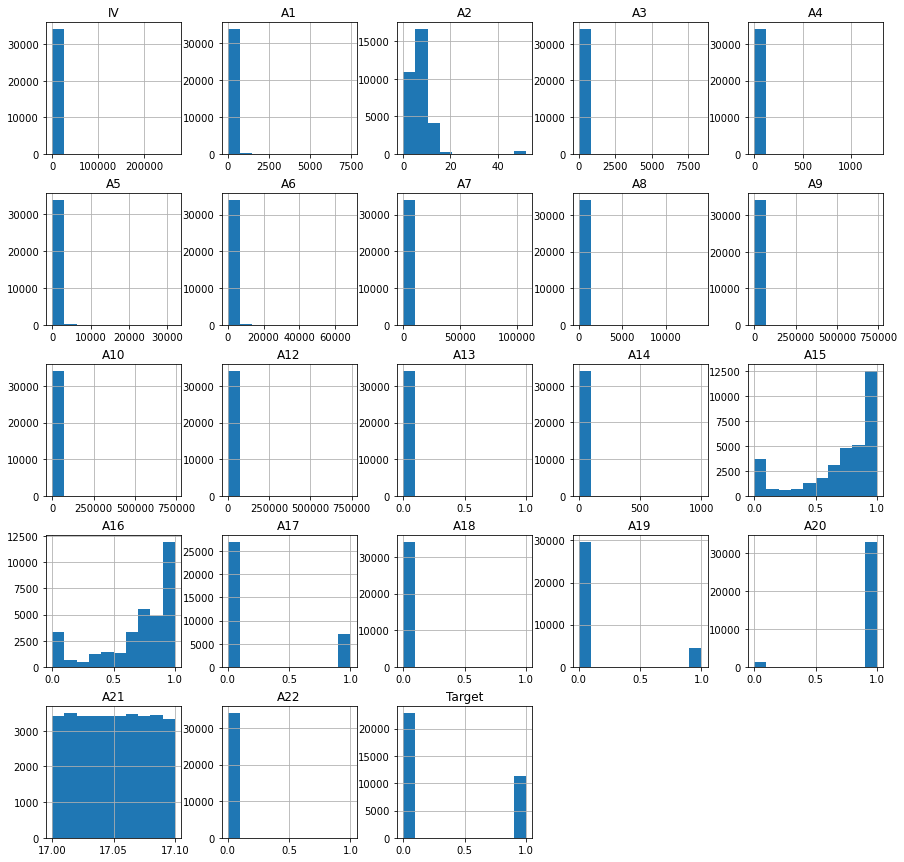

In [41]:
data.hist(figsize=(15,15))

<AxesSubplot:xlabel='IV', ylabel='Target'>

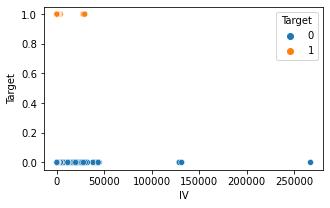

In [42]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='IV',y='Target',hue='Target',data=data)

People having variable IV ranging between 0-50000 appear to be having more risk of Coronary heart disease.

<AxesSubplot:xlabel='A1', ylabel='Target'>

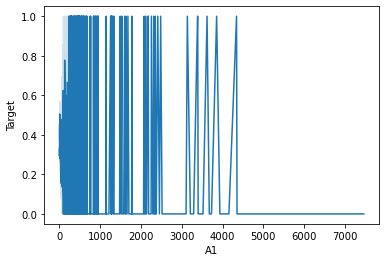

In [43]:
sns.lineplot(x = 'A1', y = 'Target', data = data)

People having variable A1 ranging between 0-4000 appear to be having more risk of Coronary heart disease.

<AxesSubplot:xlabel='A3', ylabel='Target'>

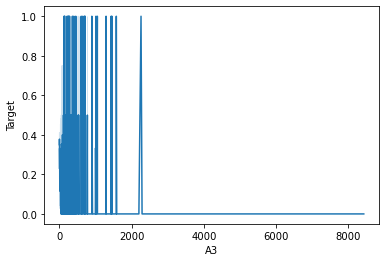

In [44]:
sns.lineplot(x = 'A3', y = 'Target', data = data,palette='deep')

People having variable A3 ranging between 0-2000 appear to be having more risk of Coronary heart disease.

<AxesSubplot:xlabel='A4', ylabel='Target'>

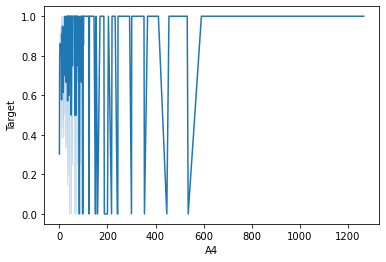

In [45]:
sns.lineplot(x = 'A4', y = 'Target', data = data)

People having variable A4 ranging between 0-500 appear to be having more risk of Coronary heart disease.

<AxesSubplot:xlabel='A8', ylabel='Target'>

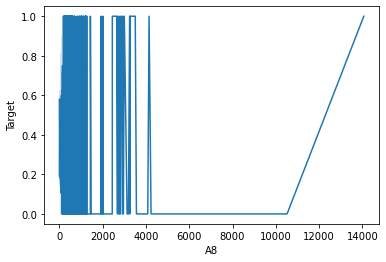

In [46]:
sns.lineplot(x = 'A8', y = 'Target', data = data)

People having variable A8 ranging between 0-4000 and above 12000 appear to be having more risk of Coronary heart disease.

<AxesSubplot:xlabel='A12', ylabel='Target'>

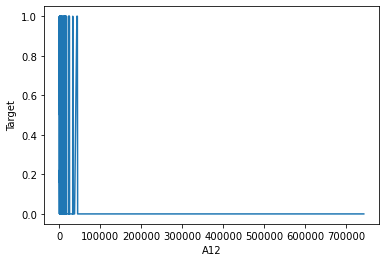

In [47]:
sns.lineplot(x = 'A12', y = 'Target', data = data,palette='deep')

People having variable IV ranging between 0-50000 appear to be having more risk of Coronary heart disease.

<AxesSubplot:xlabel='A14', ylabel='Target'>

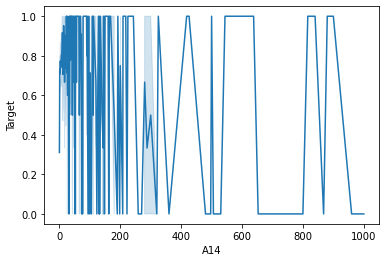

In [48]:
sns.lineplot(x = 'A14', y = 'Target', data = data,palette='deep')

People having variable A14 ranging between 0-500 appear to be having more risk of Coronary heart disease.

<AxesSubplot:xlabel='A1', ylabel='A5'>

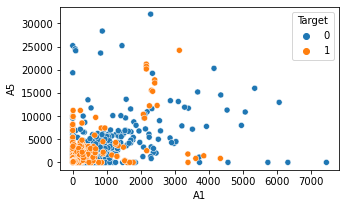

In [49]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='A1',y='A5',hue='Target',data=data)

Comparing A1 and A5,people with A1 value between 0-2000 and A5 value 0-10000 are at more risk.

<AxesSubplot:xlabel='A1', ylabel='A6'>

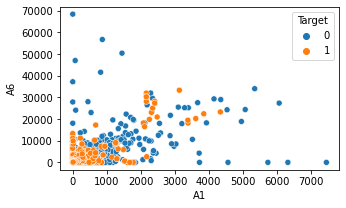

In [50]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='A1',y='A6',hue='Target',data=data)

Comparing A1 and A6,people with A1 value between 0-2000 and A6 value 0-35000 are at more risk.

<AxesSubplot:xlabel='A6', ylabel='A5'>

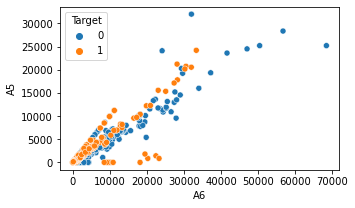

In [51]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='A6',y='A5',hue='Target',data=data)

For people having high risk, A5 and A6 values lie in the almost same range.

<AxesSubplot:xlabel='A7', ylabel='A5'>

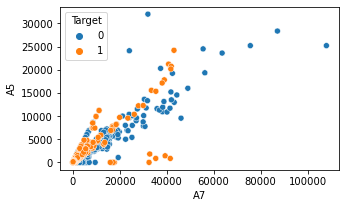

In [52]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='A7',y='A5',hue='Target',data=data)

<AxesSubplot:xlabel='A6', ylabel='A7'>

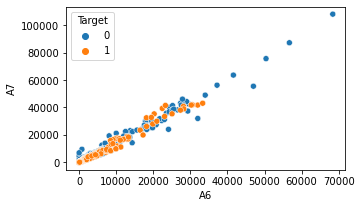

In [53]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='A6',y='A7',hue='Target',data=data)

For people having high risk, A7 and A6 values lie in the almost same range.

<AxesSubplot:xlabel='A10', ylabel='A12'>

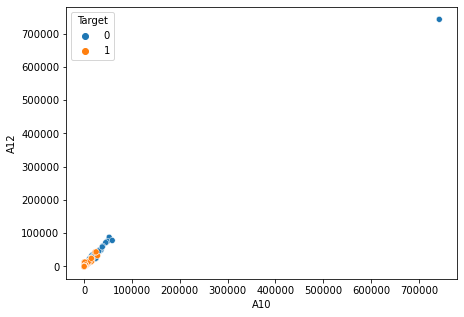

In [54]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='A10',y='A12',hue='Target',data=data)

People with high risk have A10 and A12 values near to zero.

<AxesSubplot:xlabel='A15', ylabel='A17'>

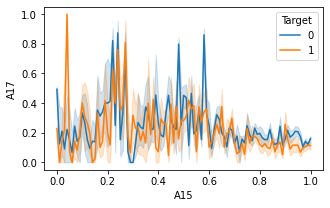

In [55]:
plt.figure(figsize=(5,3))
sns.lineplot(x='A15',y='A17',hue='Target',data=data)

For people with high risk, A15 and A17 vary in almost same fashion. 

In [56]:
data.dropna(inplace=True)

In [57]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(32498, 22)
(32498,)


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)


In [59]:
#MinMAxScaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test  = rf.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rf_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rf_test, y_test))


Training accuracy : 1.0
Testing accuracy  : 0.9131076923076923


In [62]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_rf_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_rf_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

print('\n')

print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_rf_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_rf_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.0
Mean Absolute Error           : 0.0
Root mean Square Error (RMSE) : 0.0


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.0868923076923077
Mean Absolute Error           : 0.0868923076923077
Root mean Square Error (RMSE) : 0.2947750119876305


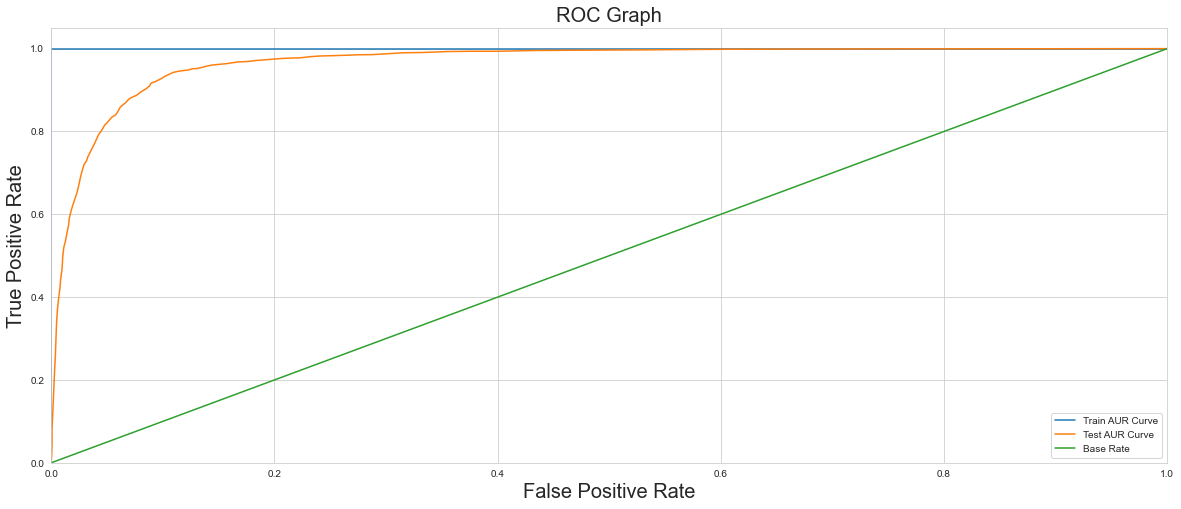

In [63]:
from sklearn.metrics import roc_curve
FPR_rf_train, TPR_rf_train, Thresholds_train = roc_curve(y_train, rf.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_rf_train)
tpr_series = pd.Series(TPR_rf_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_rf_test, TPR_rf_test, Thresholds_test = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_rf_test)
tpr_series = pd.Series(TPR_rf_test)
thresholds_series = pd.Series(Thresholds_test)
sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_rf_train, TPR_rf_train, label = 'Train AUR Curve')
plt.plot(FPR_rf_test, TPR_rf_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")

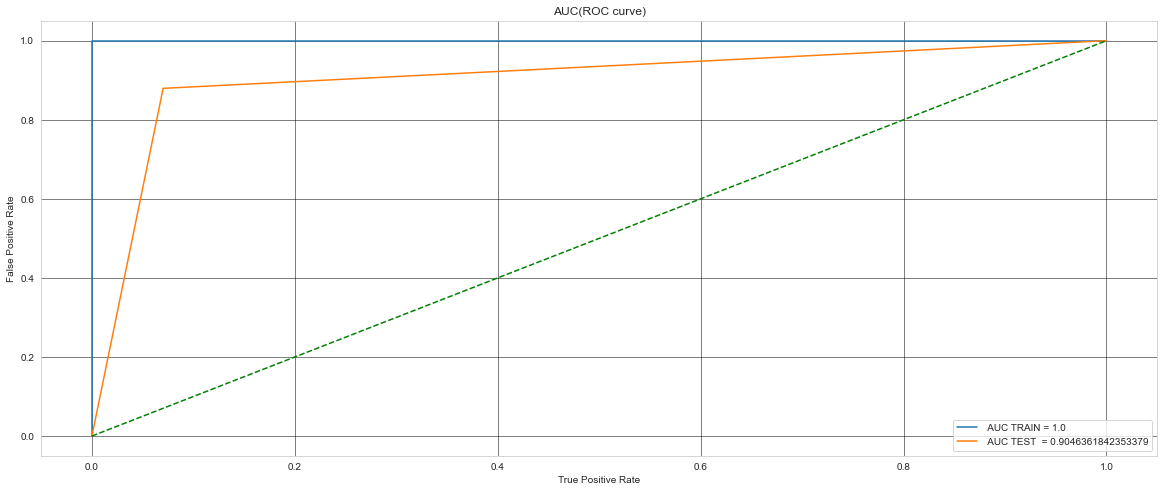

In [64]:
FPR_rf_train, TPR_rf_train, Thresholds_train = roc_curve(y_train,  y_pred_rf_train)
FPR_rf_test, TPR_rf_test, Thresholds_test    = roc_curve(y_test,  y_pred_rf_test)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_rf_train, TPR_rf_train, label = " AUC TRAIN = "+str(auc(FPR_rf_train, TPR_rf_train)))
plt.plot(FPR_rf_test, TPR_rf_test,   label = " AUC TEST  = "+str(auc(FPR_rf_test, TPR_rf_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
